In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('rule_based_eval.csv')
df.rename(columns = {'Unnamed: 0': "metrics"}, inplace=True)
df

,metrics,celltypes,currents,simenvironments,modelconcepts,modeltypes,receptors,regions
0,precision_micro,0.083333,0.186528,0.195122,0.110497,0.354839,0.142857,0.170213
1,recall_micro,0.333333,0.857143,0.800000,0.370370,0.550000,0.600000,0.615385
2,f1_micro,0.133333,0.306383,0.313725,0.170213,0.431373,0.230769,0.266667
3,jaccard,0.068056,0.173841,0.252341,0.107595,0.421875,0.124008,0.163194
4,hamming,0.015588,0.231534,0.030172,0.050623,0.086310,0.111111,0.078014


In [4]:
# remove hamming distance
df = df.iloc[:-1, :]

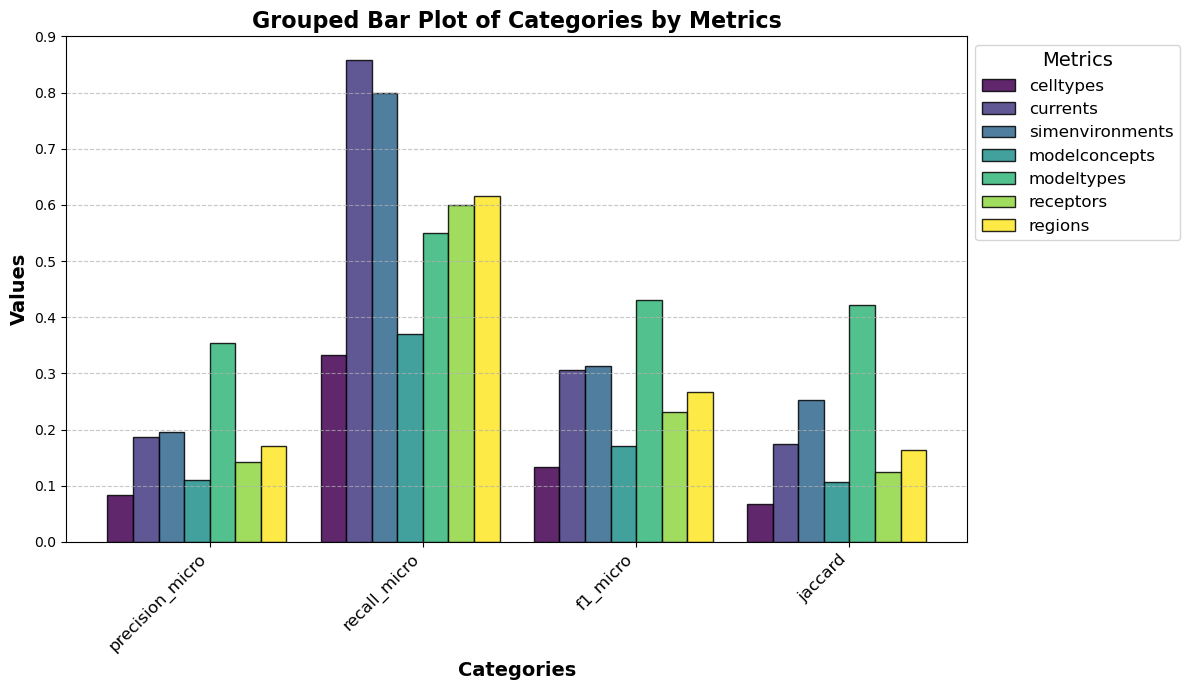

In [5]:
fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(len(df.index))  # Label locations
width = 0.12  # Width of the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(df.columns)-1))  # Generate colors

# Plot each metric with distinct colors
for i, (col, color) in enumerate(zip(df.columns[1:], colors)):
    ax.bar(x + i * width, df[col], width, label=col, color=color, edgecolor='black', alpha=0.85)

# Formatting the plot
ax.set_xlabel("Categories", fontsize=14, fontweight='bold')
ax.set_ylabel("Values", fontsize=14, fontweight='bold')
ax.set_title("Grouped Bar Plot of Categories by Metrics", fontsize=16, fontweight='bold')
ax.set_xticks(x + width * (len(df.columns) - 1) / 2)
ax.set_xticklabels(df['metrics'], rotation=45, ha='right', fontsize=12)
ax.legend(title="Metrics", fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1,1))
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()